In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model as lm
import math
import matplotlib.pyplot as plt
%matplotlib inline
import operator
from itertools import product

In [10]:
file = pd.ExcelFile('mergedData_v1.xlsx')

data = file.parse('Sheet1')
data.head()

,Date,CO,Wheat,SMAVG,Gold,USD/CNY,USD/EUR,USD/MYR,USD/AUD,USD/GBP,...,FTSE,DAX,SHA,TNX,USAgg,GlobalAgg,GlobalAggHY,JP10Y,FED,LIBOR1Y
0,1914-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1914-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1914-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1914-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1914-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since there are so many NAs from early days, let's try from the time when all products have data:

In [11]:
S = data.loc[data.Date>='2006-01-13']
S.head()

,Date,CO,Wheat,SMAVG,Gold,USD/CNY,USD/EUR,USD/MYR,USD/AUD,USD/GBP,...,FTSE,DAX,SHA,TNX,USAgg,GlobalAgg,GlobalAggHY,JP10Y,FED,LIBOR1Y
7730,2006-01-13,63.920000,384.000000,129.000000,557.350000,8.069333,0.823700,3.744880,1.326337,0.563617,...,5711.000000,5483.090000,1221.459000,4.353400,1244.440000,312.384000,520.070000,1.459000,4.25,4.846880
7731,2006-01-15,65.396667,381.833333,143.333333,556.400000,8.070000,0.824100,3.740790,1.325660,0.563090,...,5698.133333,5438.400000,1232.742000,4.352033,1244.653333,312.148100,520.493333,1.466000,4.27,4.844587
7732,2006-01-18,66.873333,379.666667,157.666667,555.450000,8.068333,0.825027,3.742953,1.330393,0.564410,...,5685.266667,5393.710000,1244.025000,4.350667,1244.866667,311.912200,520.916667,1.473000,4.29,4.842293
7733,2006-01-20,68.350000,377.500000,172.000000,554.500000,8.066667,0.825953,3.745117,1.335127,0.565730,...,5672.400000,5349.020000,1255.308000,4.349300,1245.080000,311.676300,521.340000,1.480000,4.28,4.840000
7734,2006-01-22,68.153333,383.000000,193.666667,556.166667,8.065000,0.826880,3.747280,1.339860,0.567050,...,5710.533333,5448.486667,1256.220667,4.402600,1242.883333,311.066833,522.066667,1.503333,4.27,4.865627


In [12]:
S.columns

Index(['Date', 'CO', 'Wheat', 'SMAVG', 'Gold', 'USD/CNY', 'USD/EUR', 'USD/MYR',
       'USD/AUD', 'USD/GBP', 'USD/JPY', 'USD/BRL', 'USD/HKD', 'USD/MXN',
       'USD/CAD', 'NZD', 'GDPGrowth', 'Inflation', 'MXEF', 'MXEA ', 'MSCI',
       'SPX', 'RUI', 'RUT', 'RUA', 'NI225', 'SXXP', 'HSI', 'FTSE', 'DAX',
       'SHA', 'TNX', 'USAgg', 'GlobalAgg', 'GlobalAggHY', 'JP10Y', 'FED',
       'LIBOR1Y'],
      dtype='object')

## Let's see how LIBOR impacts SPX (Univariate Model)

In [13]:
lmModel = LinearRegression()
IV = ['LIBOR1Y']
DV = ['SPX']
lmModel.fit(S[IV].values,S[DV].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Check coefficient
lmModel.coef_

array([[-59.22000085]])

In [15]:
# Check R square
lmModel.score(S[IV].values,S[DV].values)*100

6.744399905314113

## 6.8%... That is sad...

In [16]:
file2 = pd.ExcelFile('InterestRateHikes.xlsx')
file2.sheet_names

['Indices list', 'FedRateHikes', 'HighestChanges']

In [17]:
data2 = file2.parse('FedRateHikes')
data2.head()

,Date,FED_Eff,Change,Periods
0,1954-07-01,0.80,0.42,0.42
1,1954-08-01,1.22,-0.16,0.00
2,1954-09-01,1.06,-0.21,0.00
3,1954-10-01,0.85,-0.02,0.00
4,1954-11-01,0.83,0.45,0.45


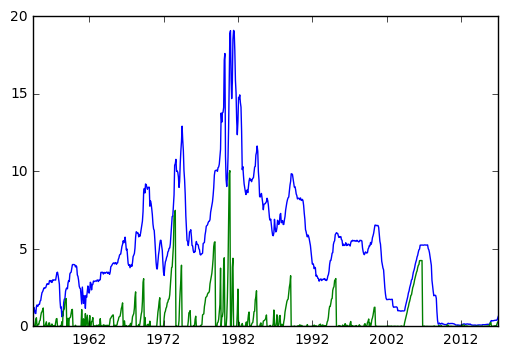

In [18]:
plt.plot(data2.Date,data2.FED_Eff)
plt.plot(data2.Date,data2.Periods)

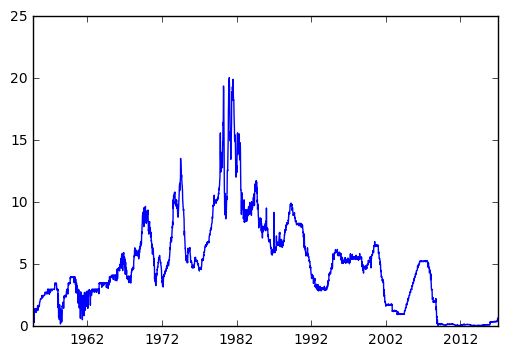

In [19]:
plt.plot(data.Date,data.FED)

In [20]:
interestC = pd.merge(data,data2,how = 'inner', on = ['Date'])[['Date','FED','FED_Eff']]

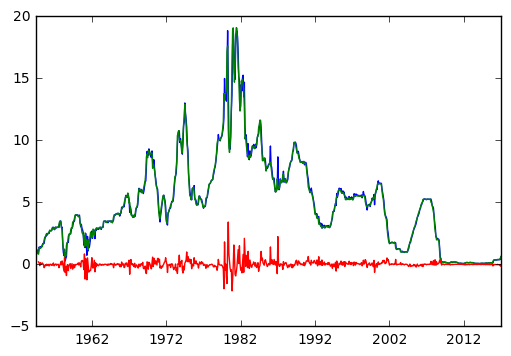

In [21]:
plt.plot(interestC.Date,interestC.FED)
plt.plot(interestC.Date,interestC.FED_Eff)
plt.plot(interestC.Date,interestC.FED-interestC.FED_Eff)

In [22]:
data2.sort_values(by = ['Date'],ascending = [True])
data2.head(10)

,Date,FED_Eff,Change,Periods
0,1954-07-01,0.80,0.42,0.42
1,1954-08-01,1.22,-0.16,0.00
2,1954-09-01,1.06,-0.21,0.00
3,1954-10-01,0.85,-0.02,0.00
4,1954-11-01,0.83,0.45,0.45
5,1954-12-01,1.28,0.11,0.56
6,1955-01-01,1.39,-0.10,0.00
7,1955-02-01,1.29,0.06,0.06
8,1955-03-01,1.35,0.08,0.14
9,1955-04-01,1.43,0.00,0.14


In [23]:
target = ['Change']
K = 3
D = 1
P = np.identity(K)
MU = np.random.rand(K,D)
MU = np.array([[-0.05],[0],[0.05]])
SIGMA = {}
for i in range(K):
    aRandomMatrix = np.random.rand(D,D)
    SIGMA[i] = np.dot(aRandomMatrix,aRandomMatrix.transpose())


print(MU);print(SIGMA);print(P)

[[-0.05]
 [ 0.  ]
 [ 0.05]]
{0: array([[ 0.50916855]]), 1: array([[ 0.04015251]]), 2: array([[ 0.01996987]])}
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [24]:
m = data2.loc[pd.notnull(data2.Change)].copy()
m['ChangeL1'] = 0.00
m['ChangeL1'].values[1:] = m.Change.values[0:-1]
m.head()

,Date,FED_Eff,Change,Periods,ChangeL1
0,1954-07-01,0.80,0.42,0.42,0.00
1,1954-08-01,1.22,-0.16,0.00,0.42
2,1954-09-01,1.06,-0.21,0.00,-0.16
3,1954-10-01,0.85,-0.02,0.00,-0.21
4,1954-11-01,0.83,0.45,0.45,-0.02


In [25]:
psiList = [];
for i in range(K):
    label = 'psi'+str(i)
    m[label] = 0.00
    m[label] = st.multivariate_normal.pdf(m[['Change']].values,mean = MU[i,:],cov = SIGMA[i])
#     m[label+'L1'] = 0.00
#     m[label+'L1'].values[1:,] = m[label].values[0:-1]
    psiList.append(label)
    

psiL1List = [x+'L1' for x in psiList]
print(psiList)
print(psiL1List)

['psi0', 'psi1', 'psi2']
['psi0L1', 'psi1L1', 'psi2L1']


In [26]:
rList = []
for i in range(K):
    m['r'+str(i)] = m['psi'+str(i)]/m[psiList].sum(axis = 1)
    rList.append('r'+str(i))

In [27]:
conditionalLikelihood = np.dot(m[rList].values[0:-1,],P)*m[psiList].values[1:]
r = conditionalLikelihood/np.sum(conditionalLikelihood,axis =1)[:,np.newaxis]

m.loc[1:,rList] = r
m.head(10)

,Date,FED_Eff,Change,Periods,ChangeL1,psi0,psi1,psi2,r0,r1,r2
0,1954-07-01,0.80,0.42,0.42,0.00,0.450061,0.221346,0.091645,0.589817,0.290080,0.120103
1,1954-08-01,1.22,-0.16,0.00,0.42,0.552483,1.447463,0.935816,0.379734,0.489292,0.130974
2,1954-09-01,1.06,-0.21,0.00,-0.16,0.545207,1.149630,0.519586,0.122871,0.678787,0.198342
3,1954-10-01,0.85,-0.02,0.00,-0.21,0.558593,1.981027,2.497130,0.078503,0.587051,0.334446
4,1954-11-01,0.83,0.45,0.45,-0.02,0.437382,0.159927,0.051395,0.354352,0.459506,0.186142
5,1954-12-01,1.28,0.11,0.56,0.45,0.545207,1.712443,2.579746,0.369759,0.424653,0.205588
6,1955-01-01,1.39,-0.10,0.00,0.11,0.557716,1.757815,1.607175,0.040758,0.403488,0.555753
7,1955-02-01,1.29,0.06,0.06,-0.10,0.552483,1.903639,2.816016,0.037668,0.409066,0.553266
8,1955-03-01,1.35,0.08,0.14,0.06,0.549885,1.838409,2.760172,0.026244,0.302317,0.671439
9,1955-04-01,1.43,0.00,0.14,0.08,0.557716,1.990920,2.651784,0.027173,0.324301,0.648526


In [28]:
MU = np.dot(m[rList].values.transpose(),m[['Change']].values)/(np.sum(m[rList].values,axis=0)[:,np.newaxis])

In [29]:
MU

array([[-0.05852965],
       [-0.00186256],
       [ 0.04236928]])

In [30]:
for i in range(K):
    label = 'r'+str(i)
    Q = np.diag(m[label]/np.sum(m[label]))
    error = m[['Change']].values-MU[i]
    SIGMA[i] = np.dot(np.squeeze(np.dot(Q,error).transpose()),np.squeeze(error))

In [31]:
for j,k in product(range(K),range(K)):
    P[j,k] = np.sum(m[['r'+str(j)]].values[0:-1]*m[['r'+str(k)]].values[1:],axis = 0)/np.sum(m[['r'+str(j)]].values[0:-1],axis = 0)
    
P

array([[ 0.62062784,  0.23222236,  0.1471498 ],
       [ 0.18851554,  0.38771218,  0.42377228],
       [ 0.10028309,  0.37432274,  0.52539418]])

In [32]:
for ite in range(1000):
    for i in range(K):
        label = 'psi'+str(i)
        m[label] = 0.00
        m[label] = st.multivariate_normal.pdf(m[['Change']].values,mean = MU[i,:],cov = SIGMA[i])
        
#     for i in range(K):
#         m['r'+str(i)] = m['psi'+str(i)]/m[psiList].sum(axis = 1)

    conditionalLikelihood = np.dot(m[rList].values[0:-1,],P)*m[psiList].values[1:]
    r = conditionalLikelihood/np.sum(conditionalLikelihood,axis =1)[:,np.newaxis]

    m.loc[1:,rList] = r

    MU = np.dot(m[rList].values.transpose(),m[['Change']].values)/(np.sum(m[rList].values,axis=0)[:,np.newaxis])

    for i in range(K):
        label = 'r'+str(i)
        Q = np.diag(m[label]/np.sum(m[label]))
        error = m[['Change']].values-MU[i]
        SIGMA[i] = np.dot(np.squeeze(np.dot(Q,error).transpose()),np.squeeze(error))

    for j,k in product(range(K),range(K)):
        P[j,k] = np.sum(m[['r'+str(j)]].values[0:-1]*m[['r'+str(k)]].values[1:],axis = 0)/np.sum(m[['r'+str(j)]].values[0:-1],axis = 0)

In [33]:
SIGMA

{0: 2.080552702029808, 1: 0.079949975675829538, 2: 0.00086781834283269151}

In [34]:
P

array([[ 0.44970402,  0.49374169,  0.05655429],
       [ 0.08732808,  0.73169385,  0.18097807],
       [ 0.0140714 ,  0.32937601,  0.6565526 ]])

In [35]:
MU

array([[-0.12111987],
       [ 0.01840881],
       [ 0.00438771]])

In [36]:
m['State'] = 'Stable'
for i in range(m.shape[0]):
    if m.loc[i,'r0'] == np.amax(m.loc[i,rList]):
        m.loc[i,'State'] = 'Rising'
    elif m.loc[i,'r1'] == np.amax(m.loc[i,rList]):
        m.loc[i,'State'] = 'Stable'
    else:
        m.loc[i,'State'] = 'Falling'

In [39]:
# Change the year of beginning and ending here--------------
begin_year = 1987
end_year = 1989
# Then press Ctrl+Enter-------------------------------------------------

begin_year = str(begin_year)+'-12-01'
end_year = str(end_year)+'-12-01'
m.loc[np.logical_and(m.Date > begin_year, m.Date<=end_year),['Date','FED_Eff','Change','State']]

,Date,FED_Eff,Change,State
402,1988-01-01,6.83,-0.25,Stable
403,1988-02-01,6.58,0.00,Falling
404,1988-03-01,6.58,0.29,Stable
405,1988-04-01,6.87,0.22,Stable
406,1988-05-01,7.09,0.42,Stable
407,1988-06-01,7.51,0.24,Stable
408,1988-07-01,7.75,0.26,Stable
409,1988-08-01,8.01,0.18,Stable
410,1988-09-01,8.19,0.11,Stable
411,1988-10-01,8.30,0.05,Stable
